In [1]:
import pandas as pd
raw_df = pd.read_csv('/Users/ethanmc/git-repos/kaggle/challenge-home-values/house_price_regression_dataset.csv')


In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [3]:
raw_df.shape

(1000, 8)

In [4]:
raw_df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [5]:
raw_df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


array([[<Axes: title={'center': 'Square_Footage'}>,
        <Axes: title={'center': 'Num_Bedrooms'}>,
        <Axes: title={'center': 'Num_Bathrooms'}>],
       [<Axes: title={'center': 'Year_Built'}>,
        <Axes: title={'center': 'Lot_Size'}>,
        <Axes: title={'center': 'Garage_Size'}>],
       [<Axes: title={'center': 'Neighborhood_Quality'}>,
        <Axes: title={'center': 'House_Price'}>, <Axes: >]], dtype=object)

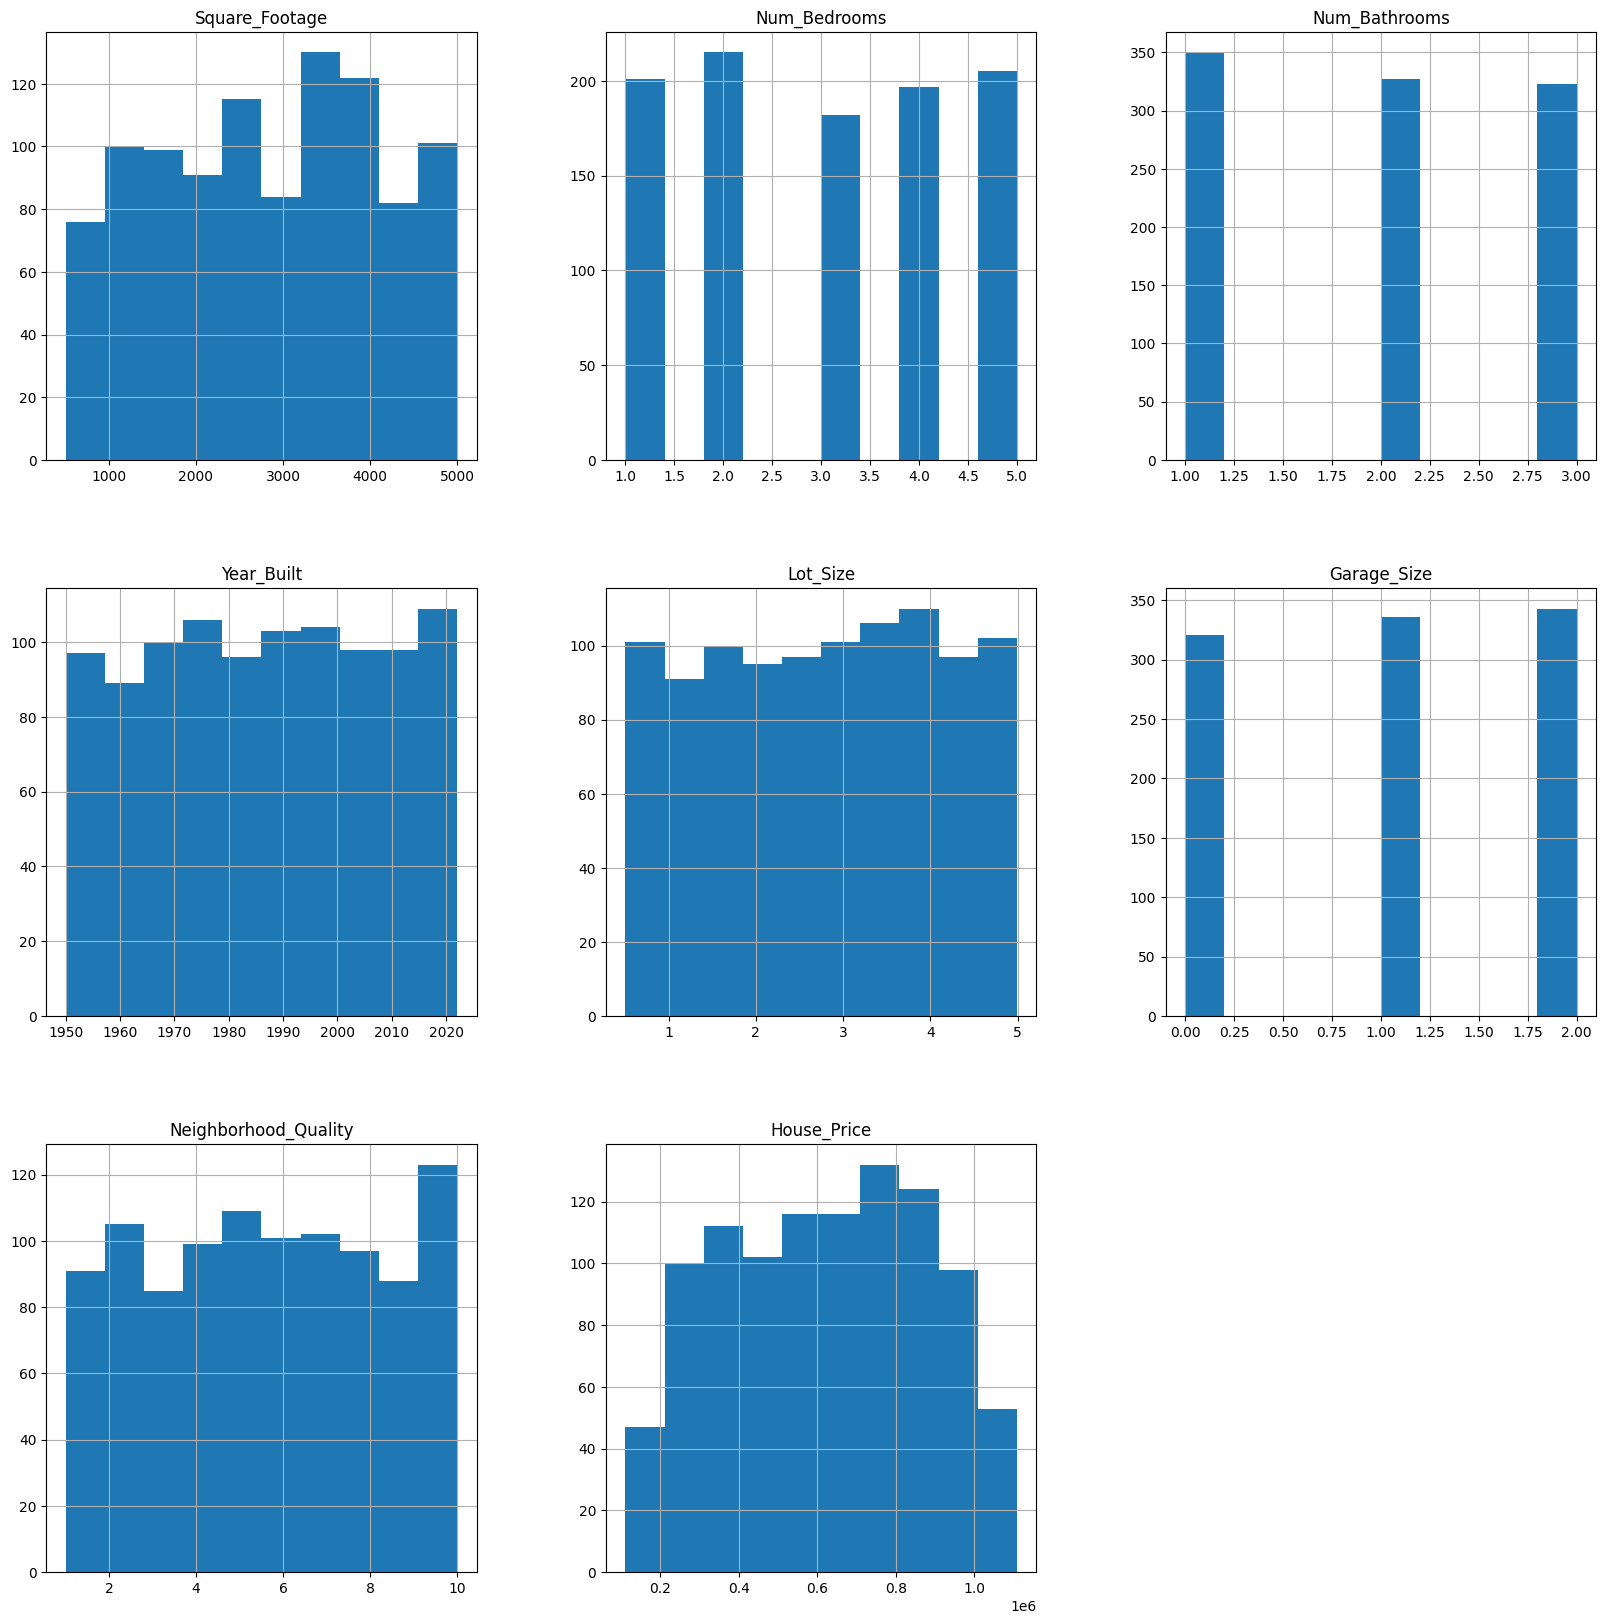

In [9]:
from matplotlib import pyplot as plt
raw_df.hist(figsize=(20,20))
#plt.show()

In [10]:
raw_df['House_Price'].median()

np.float64(628267.2911288175)

In [11]:
raw_df['House_Price_Bucket'] = raw_df['House_Price'].apply(lambda x: 1 if x > raw_df['House_Price'].median() else 0)

In [12]:
raw_df.nunique()

Square_Footage           894
Num_Bedrooms               5
Num_Bathrooms              3
Year_Built                73
Lot_Size                1000
Garage_Size                3
Neighborhood_Quality      10
House_Price             1000
House_Price_Bucket         2
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

clf_X_train, clf_X_test, clf_y_train, clf_y_test = train_test_split(raw_df.drop(['House_Price_Bucket', 'House_Price'], axis=1), 
                                                    raw_df['House_Price_Bucket'],
                                                    test_size = 0.33, random_state = 42)

(7,)
(7, 1)


TypeError: only length-1 arrays can be converted to Python scalars

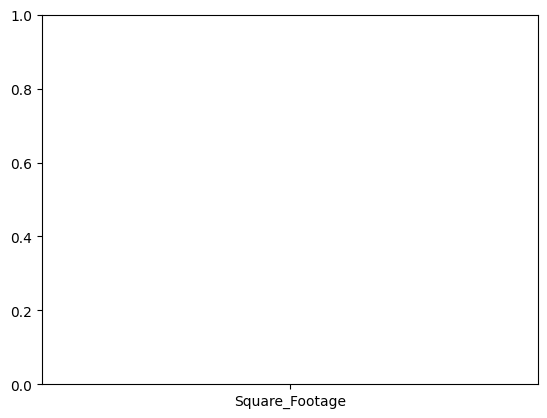

In [31]:
import numpy as np
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(clf_X_train,clf_y_train)
clf.score(clf_X_test, clf_y_test)
importance = np.abs(clf.coef_)

feature_names = np.array(clf_X_train.columns)
print(feature_names.T.shape)
print(importance.T.shape)

plt.bar(height=importance.T, x=feature_names)

